In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
# Library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import tree
import pickle
from sklearn.model_selection import GridSearchCV

Loading df

In [7]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [8]:
df = df.iloc[:,1:]

Get valuable features

In [9]:
df = df.drop(['salary'], axis=1)

Drop NaN values

In [10]:
df = df.dropna()

In [11]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


Encoding features

In [12]:
df["gender"] = df.gender.map({"M":0,"F":1})
df["hsc_s"] = df.hsc_s.map({"Commerce":0,"Science":1,"Arts":2})
df["degree_t"] = df.degree_t.map({"Comm&Mgmt":0,"Sci&Tech":1, "Others":2})
df["workex"] = df.workex.map({"No":0, "Yes":1})
df["status"] = df.status.map({"Not Placed":0, "Placed":1})
df["specialisation"] = df.specialisation.map({"Mkt&HR":0, "Mkt&Fin":1})
df['ssc_b'] = df['ssc_b'].map({'Central': 1, 'Others': 0})
df['hsc_b'] = df['hsc_b'].map({'Central': 1, 'Others': 0})


In [13]:
data_clf = df.copy()
X = data_clf[['gender', 'ssc_p', 'hsc_p', 'hsc_s', 'ssc_b','hsc_b', 'degree_p', 'degree_t', 'workex','etest_p', 'specialisation', 'mba_p']]
y = data_clf['status']

In [14]:
X

,gender,ssc_p,hsc_p,hsc_s,ssc_b,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,0,67.00,91.00,0,0,0,58.00,1,0,55.0,0,58.80
1,0,79.33,78.33,1,1,0,77.48,1,1,86.5,1,66.28
2,0,65.00,68.00,2,1,1,64.00,0,0,75.0,1,57.80
3,0,56.00,52.00,1,1,1,52.00,1,0,66.0,0,59.43
4,0,85.80,73.60,0,1,1,73.30,0,0,96.8,1,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,0,80.60,82.00,0,0,0,77.60,0,0,91.0,1,74.49
211,0,58.00,60.00,1,0,0,72.00,1,0,74.0,1,53.62
212,0,67.00,67.00,0,0,0,73.00,0,1,59.0,1,69.72
213,1,74.00,66.00,0,0,0,58.00,0,0,70.0,0,60.23


In [15]:
X = pd.get_dummies(X)
colmunn_names = X.columns.to_list()

In [16]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=40)

In [17]:
X_train

,gender,ssc_p,hsc_p,hsc_s,ssc_b,hsc_b,degree_p,degree_t,workex,etest_p,specialisation,mba_p
52,1,40.89,45.83,0,0,0,53.00,0,0,71.20,0,65.49
151,0,65.00,65.00,0,1,1,75.00,0,0,83.00,1,58.87
143,0,77.67,64.89,0,0,0,70.67,0,0,89.00,1,60.39
161,0,55.60,51.00,0,0,0,57.50,0,0,57.63,0,62.72
121,1,64.00,67.00,1,1,0,69.60,1,1,55.67,0,71.49
...,...,...,...,...,...,...,...,...,...,...,...,...
50,1,75.20,73.20,1,1,1,68.40,0,0,65.00,0,62.98
184,1,56.28,62.83,0,0,0,59.79,0,0,60.00,0,57.29
165,1,63.30,78.33,0,1,0,74.00,0,0,80.00,1,74.56
7,0,82.00,64.00,1,1,1,66.00,1,1,67.00,1,62.14


### **Decision Tree**

**Basic Model**
If you want to train by yourself, uncomment those lines 

In [18]:
# 
# dtree = DecisionTreeClassifier()
# dtree.fit(X_train, y_train)
# y_pred = dtree.predict(X_test)
# accuracy_score(y_test, y_pred)

Load model and display result

In [21]:
# load the model from disk
filename = 'decision_tree_model.sav'
dtree = pickle.load(open(filename, 'rb'))
result = dtree.score(X_test, y_test)
print(result)

0.7846153846153846


Feature Importance Calculation

In [24]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(2*len(rows)).reshape(len(rows), 2))
imp.columns = [ "Feature", "Importance"]
#Add Rows
for index in range(0, len(rows)):
    imp.iloc[index] = [rows[index], (100*dtree.feature_importances_[index])]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


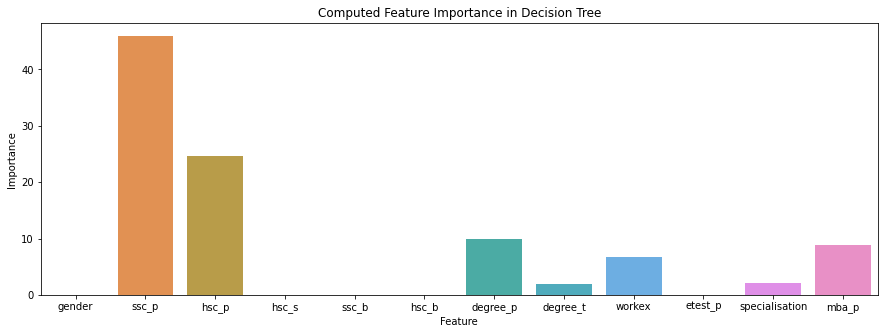

In [25]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", data=imp)
plt.title("Computed Feature Importance in Decision Tree")
plt.show()
%matplotlib inline
plt.close('all')

In [26]:
# save the model to disk
filename = 'decision_tree_model.sav'
pickle.dump(dtree, open(filename, 'wb'))
# some time later...

Tuning Hyperparameter

In [27]:
params = {'max_depth':[3,5,7,10,15],
          'min_samples_leaf':[3,5,10,15,20],
          'min_samples_split':[8,10,12,18,20,16],
          'criterion':['gini','entropy']}

In [28]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=params, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [29]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, 15],
                         'min_samples_leaf': [3, 5, 10, 15, 20],
                         'min_samples_split': [8, 10, 12, 18, 20, 16]},
             scoring='accuracy', verbose=1)

In [30]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 20}

Best Score: 0.8466666666666667


In [31]:
dtree_tuning = DecisionTreeClassifier(criterion = 'entropy', max_depth =  3, min_samples_leaf = 3, min_samples_split = 20)
dtree_tuning.fit(X_train, y_train)
y_pred = dtree_tuning.predict(X_test)
accuracy_score(y_test, y_pred)

0.8153846153846154

### **Random Forest**

**Basic model**
If you want to train by yourself, uncomment those lines

In [36]:
#Using Random Forest Algorithm
# random_forest = RandomForestClassifier()
# random_forest.fit(X_train, y_train)
# y_pred = random_forest.predict(X_test)

Load Model and display result

In [38]:
# load the model from disk
filename2 = 'random_forest_model.sav'
random_forest = pickle.load(open(filename2, 'rb'))
result = random_forest.score(X_test, y_test)
print(result)

0.8153846153846154


In [39]:
rows = list(X.columns)
imp = pd.DataFrame(np.zeros(2*len(rows)).reshape(len(rows), 2))
imp.columns = [ "Feature", "Importance"]
#Add Rows
for index in range(0, len(rows)):
    imp.iloc[index] = [rows[index], (100*random_forest.feature_importances_[index])]

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


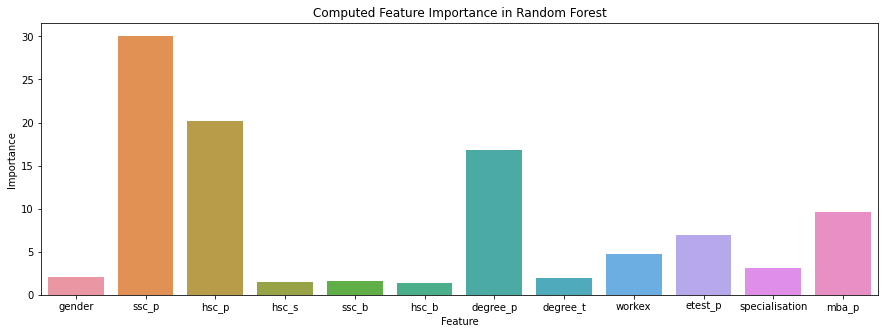

In [40]:
plt.figure(figsize=(15,5))
sns.barplot("Feature", "Importance", data=imp)
plt.title("Computed Feature Importance in Random Forest")
plt.show()
%matplotlib inline
plt.close('all')

Tuning hyperparameters

In [42]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(3, 15, num = 2)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [43]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=random_forest, 
                           param_grid=random_grid, 
                          cv=5, n_jobs=-1, verbose=1, scoring = "accuracy")

In [44]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 15],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 3, 4],
                         'min_samples_split': [2, 6, 10],
                         'n_estimators': [5, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [69]:
print('Best Parameters:',grid_search.best_params_,end='\n\n')
print('Best Score:',grid_search.best_score_)

Best Parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 20}

Best Score: 0.8800000000000001


In [72]:
# load the model from disk
filename2 = 'random_forest_tuning_model.sav'
random_forest_tuning = pickle.load(open(filename2, 'rb'))
result = random_forest_tuning.score(X_test, y_test)
print(result)

0.8461538461538461
